# Assignment 7
### Phyllis Kho

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
fname = '/data9/GR6901/data/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'

## 1) Opening data and examining metadata
## 1.1) Open the dataset and display its contents


In [3]:
ds = xr.open_dataset(fname)
ds

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 1.2) Print out the long_name attribute of each variable
Print variable: long name for each variable. Format the output so that the start of the long name attributes are aligned.

In [4]:
for var_name in ds.data_vars:
    long_name = ds[var_name].long_name
    print(f"{var_name:<30}: {long_name}")

toa_sw_all_mon                : Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon                : Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon               : Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon                : Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon                : Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon               : Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon                : Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon                : Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon               : Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon                     : Incoming Solar Flux, Monthly Means


## 2) Basic reductions, arithmetic, and plotting
## 2.1) Calculate the time-mean of the entire dataset

In [5]:
time_mean_ds = ds.mean(dim='time')

## 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation
(Use “All-Sky” conditions)

Note the sign conventions on each variable.

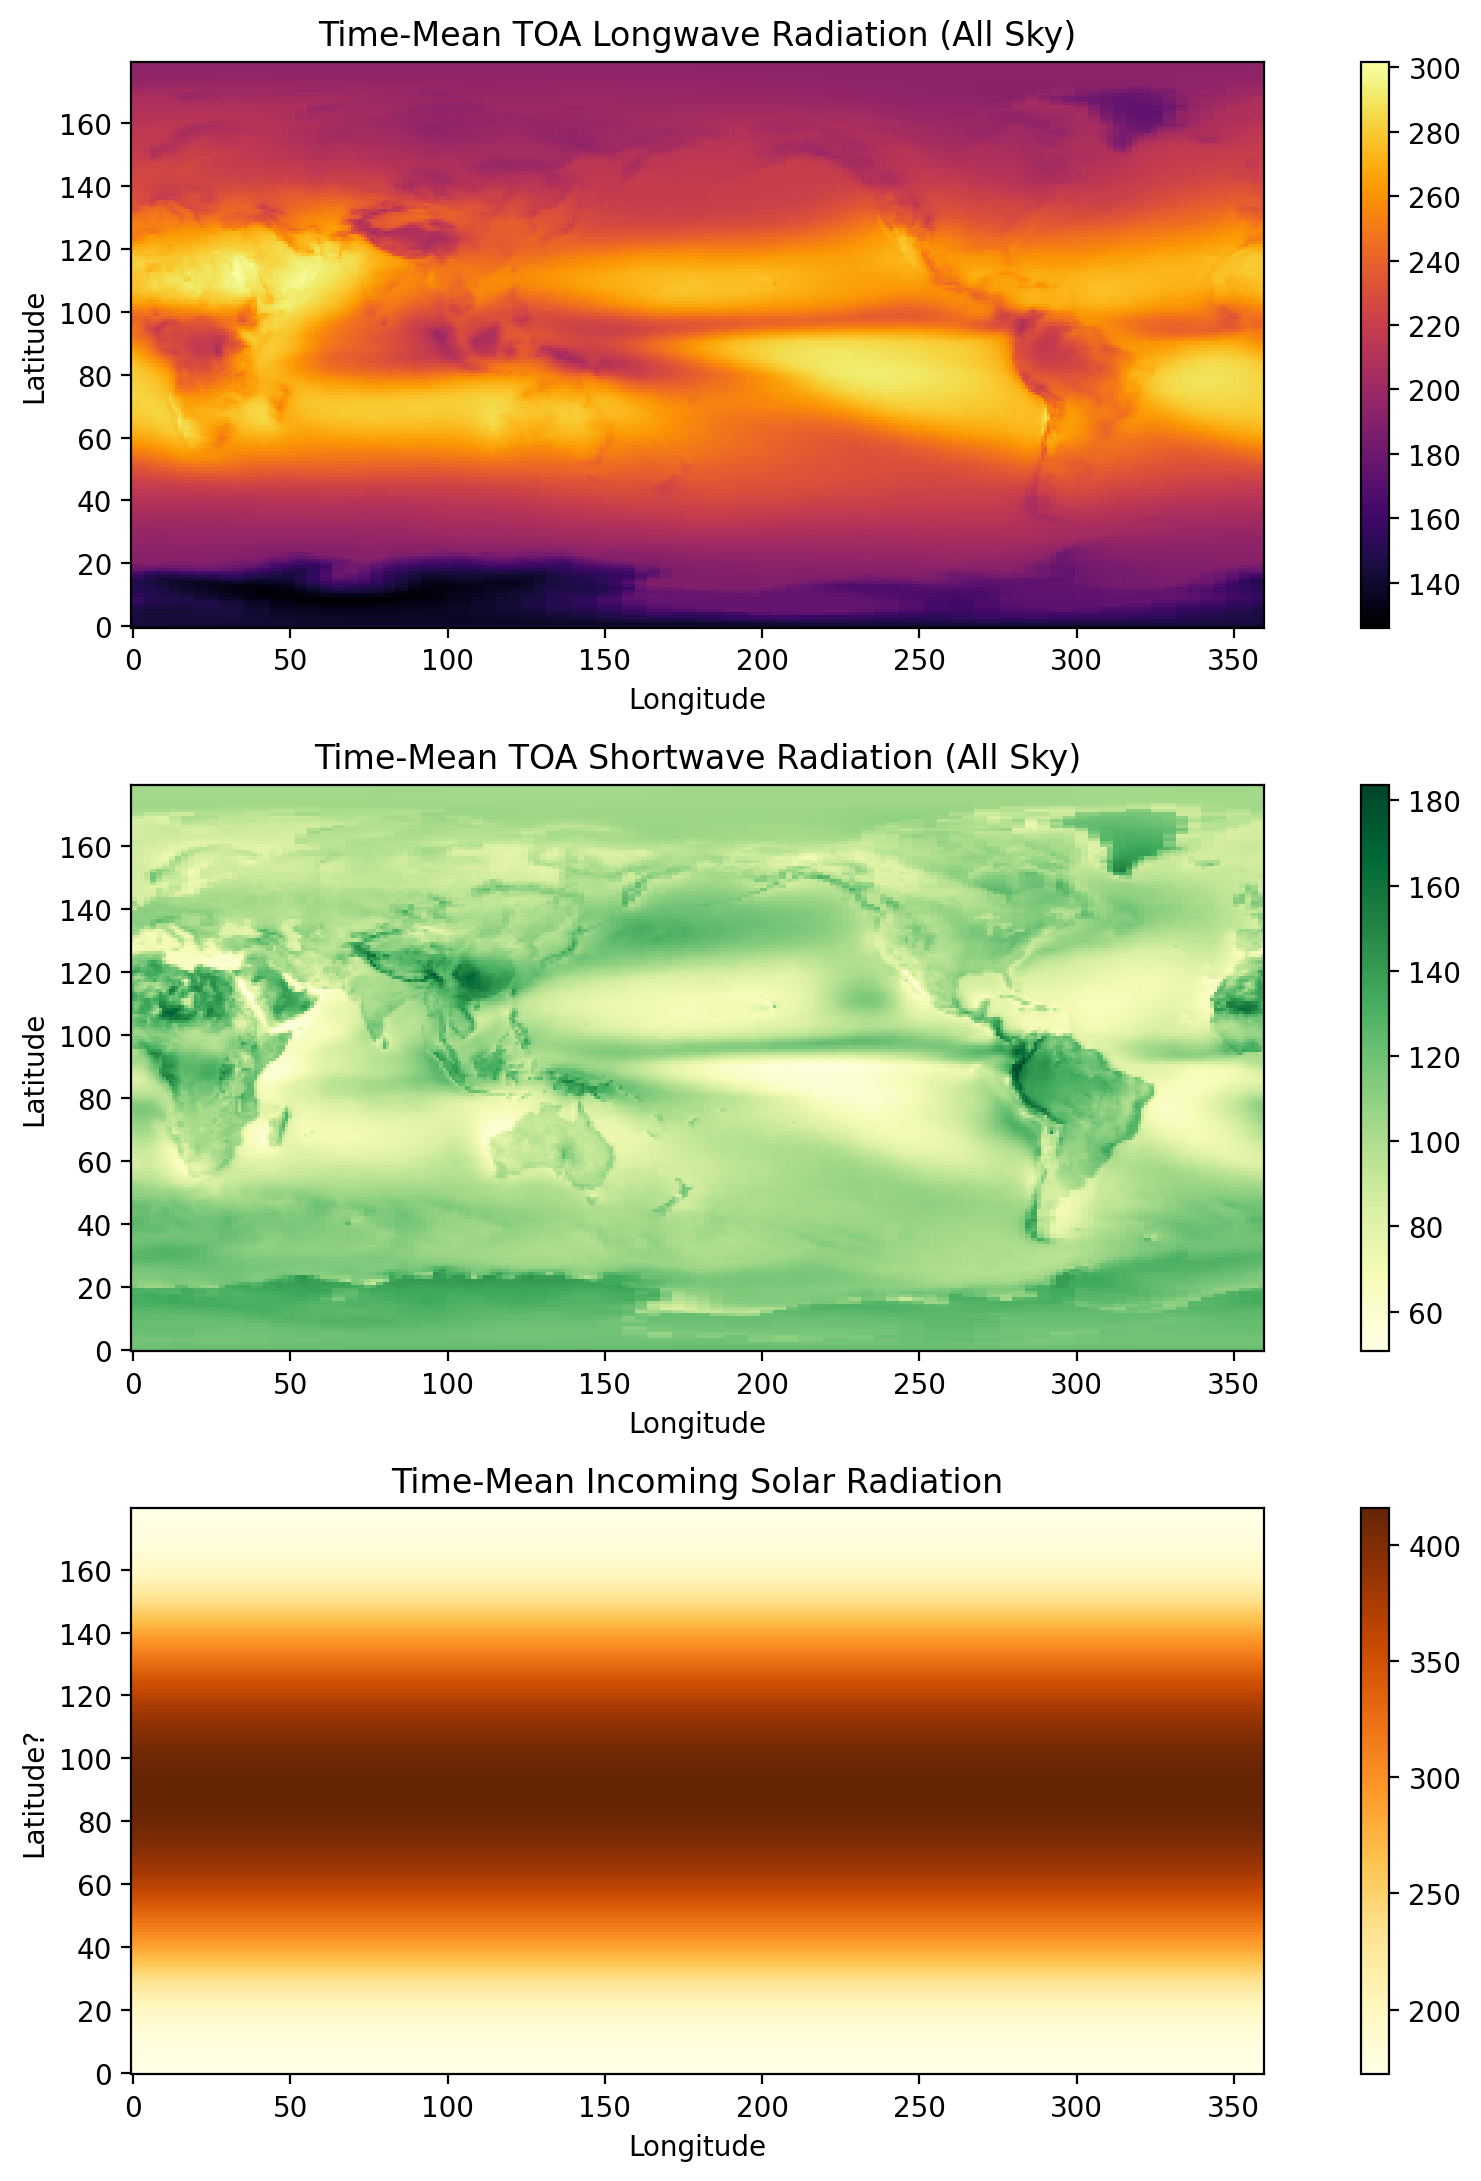

In [6]:
# Extract the variables for TOA Longwave, Shortwave, and Incoming Solar Radiation
toa_lw = time_mean_ds['toa_lw_all_mon']
toa_sw = time_mean_ds['toa_sw_all_mon']
incoming_solar = time_mean_ds['solar_mon']


fig, ax = plt.subplots(figsize=(10, 11), nrows=3)


plot_toa_lw = ax[0].imshow(toa_lw, cmap='inferno', origin='lower')
plt.colorbar(plot_toa_lw, ax=ax[0])

ax[0].set_title('Time-Mean TOA Longwave Radiation (All Sky)')
ax[0].set_xlabel('Longitude')  
ax[0].set_ylabel('Latitude')

plot_toa_sw = ax[1].imshow(toa_sw, cmap='YlGn', origin='lower')
plt.colorbar(plot_toa_sw, ax=ax[1])
ax[1].set_title('Time-Mean TOA Shortwave Radiation (All Sky)')
ax[1].set_xlabel('Longitude')  
ax[1].set_ylabel('Latitude')
# ax[1].set_xticklabels([])


plot_incoming_solar = ax[2].imshow(incoming_solar, cmap='YlOrBr', origin='lower')
plt.colorbar(plot_incoming_solar, ax=ax[2])
ax[2].set_title('Time-Mean Incoming Solar Radiation')
ax[2].set_xlabel('Longitude')  
ax[2].set_ylabel('Latitude?')

plt.tight_layout()

# Is the y-axis latitude? Not in degrees? But lon is in degrees?

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux
You have to pay attention to and think carefully about the sign conventions (positive or negative) for each variable in order for the variables to sum to the right TOA net flux. Refer to the NASA figure at the top of the page to understand incoming and outgoing radiation.

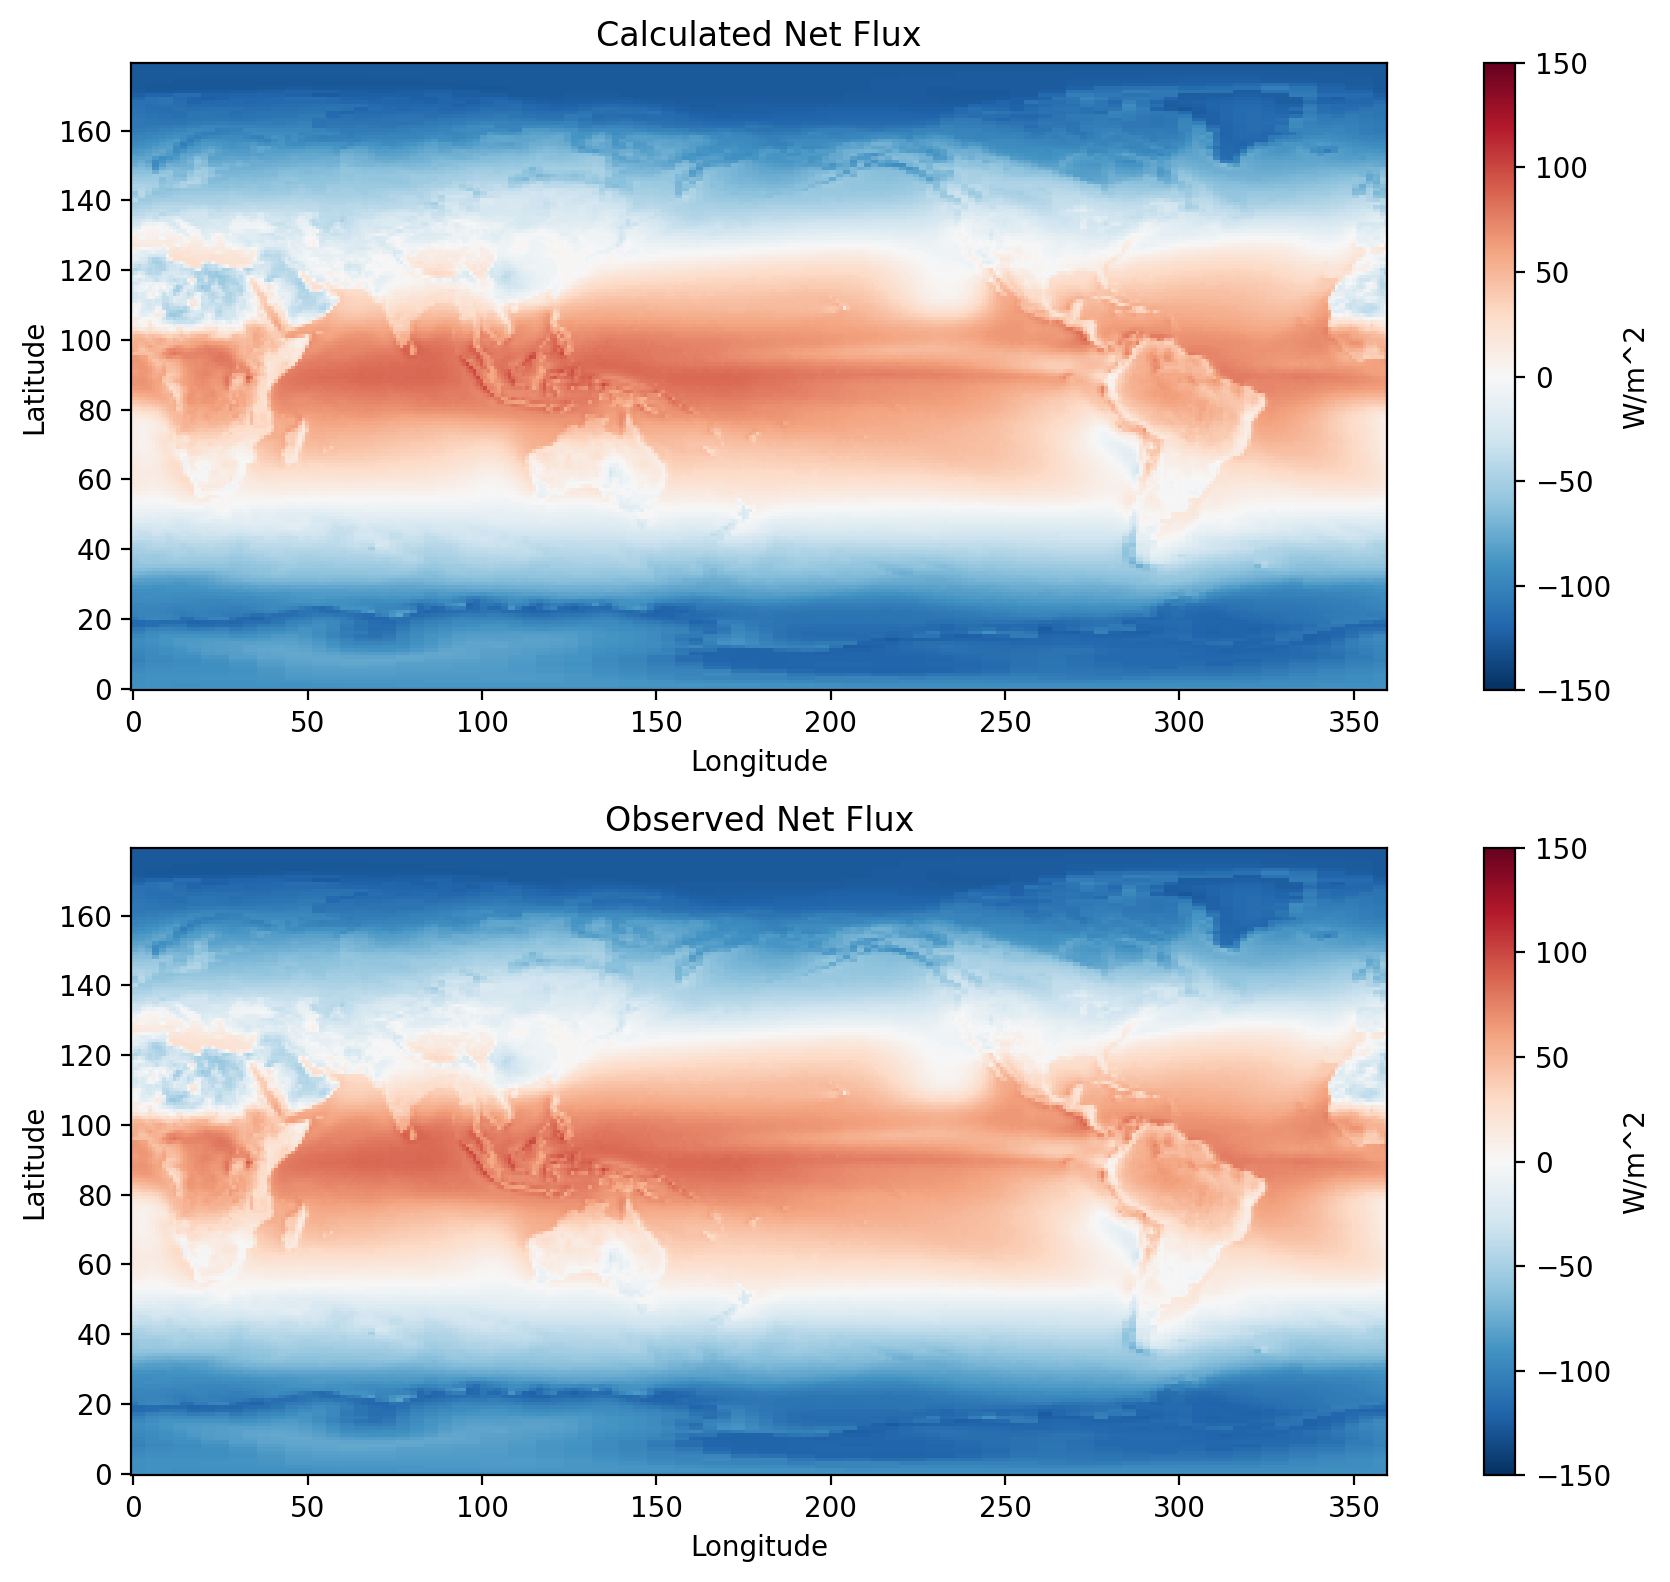

In [38]:
# Earth radiates longwave radiation (-ve).
# Earth can reflect some shortwave radiation (-ve).
# Incoming radiation (+ve).
# Net flux should be small and close to zero.

# Calculate net flux from TOA Longwave (-ve), Shortwave (-ve), and Incoming Solar Radiation (+ve).
calculated_toa_net_flux = incoming_solar - toa_lw - toa_sw

# Extract TOA net flux
toa_net_flux = time_mean_ds['toa_net_all_mon']

# Visual verification: Both figures should look the same.
fig, ax = plt.subplots(figsize=(10, 8), nrows=2)

plot_calculated_toa_net_flux = ax[0].imshow(calculated_toa_net_flux, vmin=-150, vmax=150, cmap='RdBu_r', origin='lower')
plt.colorbar(plot_calculated_toa_net_flux, ax=ax[0], label='W/m^2')
ax[0].set_title('Calculated Net Flux')
ax[0].set_xlabel('Longitude')  
ax[0].set_ylabel('Latitude')


plot_toa_net_flux = ax[1].imshow(toa_net_flux, vmin=-150, vmax=150, cmap='RdBu_r', origin='lower')
plt.colorbar(plot_toa_net_flux, ax=ax[1], label='W/m^2')
ax[1].set_title('Observed Net Flux')
ax[1].set_xlabel('Longitude')  
ax[1].set_ylabel('Latitude')

plt.tight_layout()

## 3) Mean and weighted mean
3.1) Calculate the global (unweighted) mean of TOA net radiation
Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

The answer is that each “pixel” or “grid point” of this dataset does not represent an equal area of Earth’s surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to λ. (λis latitude)

In [8]:
# Calculate the naive mean of calculated net flux
toa_net_flux.mean(dim=('lat', 'lon'))

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729012, dtype=float32)

## 3.2) Create a weight array proportional to cos(λ)
Think carefully a about radians vs. degrees

In [9]:
# Calculate the weights based on latitude
weights = np.cos(np.deg2rad(ds.lat))

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor
Use xarray’s weighted array reductions to compute the weighted mean.

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimated to be. Do you think our calculation is precise enough to detect this?The 

In [10]:
# Calculate the weighted mean
toa_net_flux_weighted_mean = toa_net_flux.weighted(weights).mean()
toa_net_flux_weighted_mean

<xarray.DataArray 'toa_net_all_mon' ()>
array(0.8780864, dtype=float32)

The Earth's net energy imbalance due to global warming is estimated to be slightly greater that 0.8 W/m^2. This calculation appears to have captured Earth's net energy imbalance as the value of 0.878 calculated is close to the estimated value of >0.8.

## 3.4) Now that you have a weight factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [11]:
# According to the infographic: 
# Total outgoing infrared radiation = 239.9
# Incoming solar radiation = 340
# Total reflected solar radiation = 99.9

In [12]:
# Calculate the net longwave radiation Earth emits by taking mean across lat and lon. 
# This should be the same as "Total outgoing infrared radiation = 239.9"
net_longwave = toa_lw.weighted(weights).mean(dim=('lat', 'lon'))
net_longwave

<xarray.DataArray 'toa_lw_all_mon' ()>
array(240.2667, dtype=float32)

The net longwave radiation emitted by Earth is 240.3 W/m^2. It is very close to the value of 239.9 W/m^2 in the infographic.

In [13]:
# Calculate the net longwave radiation Earth emits by taking mean across lat and lon. 
# This should be the same as "Total outgoing infrared radiation = 239.9"
net_shortwave = toa_sw.weighted(weights).mean(dim=('lat', 'lon'))
net_shortwave

<xarray.DataArray 'toa_sw_all_mon' ()>
array(99.138596, dtype=float32)

The net shortwave radiation reflected by Earth is 99.1 W/m^2. It is very close to the value of 99.9 W/m^2 in the infographic.

In [14]:
# Calculate the net longwave radiation Earth emits by taking mean across lat and lon. 
# This should be the same as "Total outgoing infrared radiation = 239.9"
net_incoming_solar = incoming_solar.weighted(weights).mean(dim=('lat', 'lon'))
net_incoming_solar

<xarray.DataArray 'solar_mon' ()>
array(340.28354, dtype=float32)

The net incoming solar radiation is 340.3 W/m^2. It is very close to the value of 343 W/m^2 in the infographic.

## 4) Meridional Heat Transport Calculation
We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula
dA=R^2cos(λ)dλdϕ
where dλ and dϕ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth’s radius as R = 6371
 km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it
(Xarray’s ones_like function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth’s true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere … it’s just a homework problem).

In [15]:
# Convert lat and lon to radians
ds_lat_rad = np.radians(ds['lat'])
ds_lon_rad = np.radians(ds['lon'])

# Create arrays using ones_like to contain the distance between two consecutive points in lat and lon
distance_lat_rad = xr.ones_like(ds['lat'])[:-1]
distance_lon_rad = xr.ones_like(ds['lon'])[:-1]

# Loop through and calculate the distance between two consecutive points in lat (dλ) and lon (dϕ)
for i in range(len(ds_lat_rad) - 1):
    diff_lat_rad = ds_lat_rad[i + 1] - ds_lat_rad[i]
    distance_lat_rad[i] = diff_lat_rad

for i in range(len(ds_lon_rad) - 1):
    diff_lon_rad = ds_lon_rad[i + 1] - ds_lon_rad[i]
    distance_lon_rad[i] = diff_lon_rad

# Earth's radius in km
R = 6371

# Calculate each pixel area using dA=R^2cos(λ)dλdϕ
dA = R**2*np.cos(ds_lat_rad)*(distance_lat_rad)*(distance_lon_rad)

# Find the sum of all pixel areas
dA_sum = dA.sum()

# Calculate the area of a sphere with Earth's radius
earth_sphere_area = 4*np.pi*(R**2)

# Print dA_sum and earth_sphere_area
print(dA_sum)
print(earth_sphere_area)

<xarray.DataArray ()>
array(5.08615326e+08)
510064471.90978825


The calculated sum of all pixels is very close to the surface area of Earth (assuming it is a sphere).

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band
Multiplying the pixel area (m^2) from above with the radiative flux (W m^-2) gives you the total amount of radiation absorbed in each pixel in W.

Label with correct units.

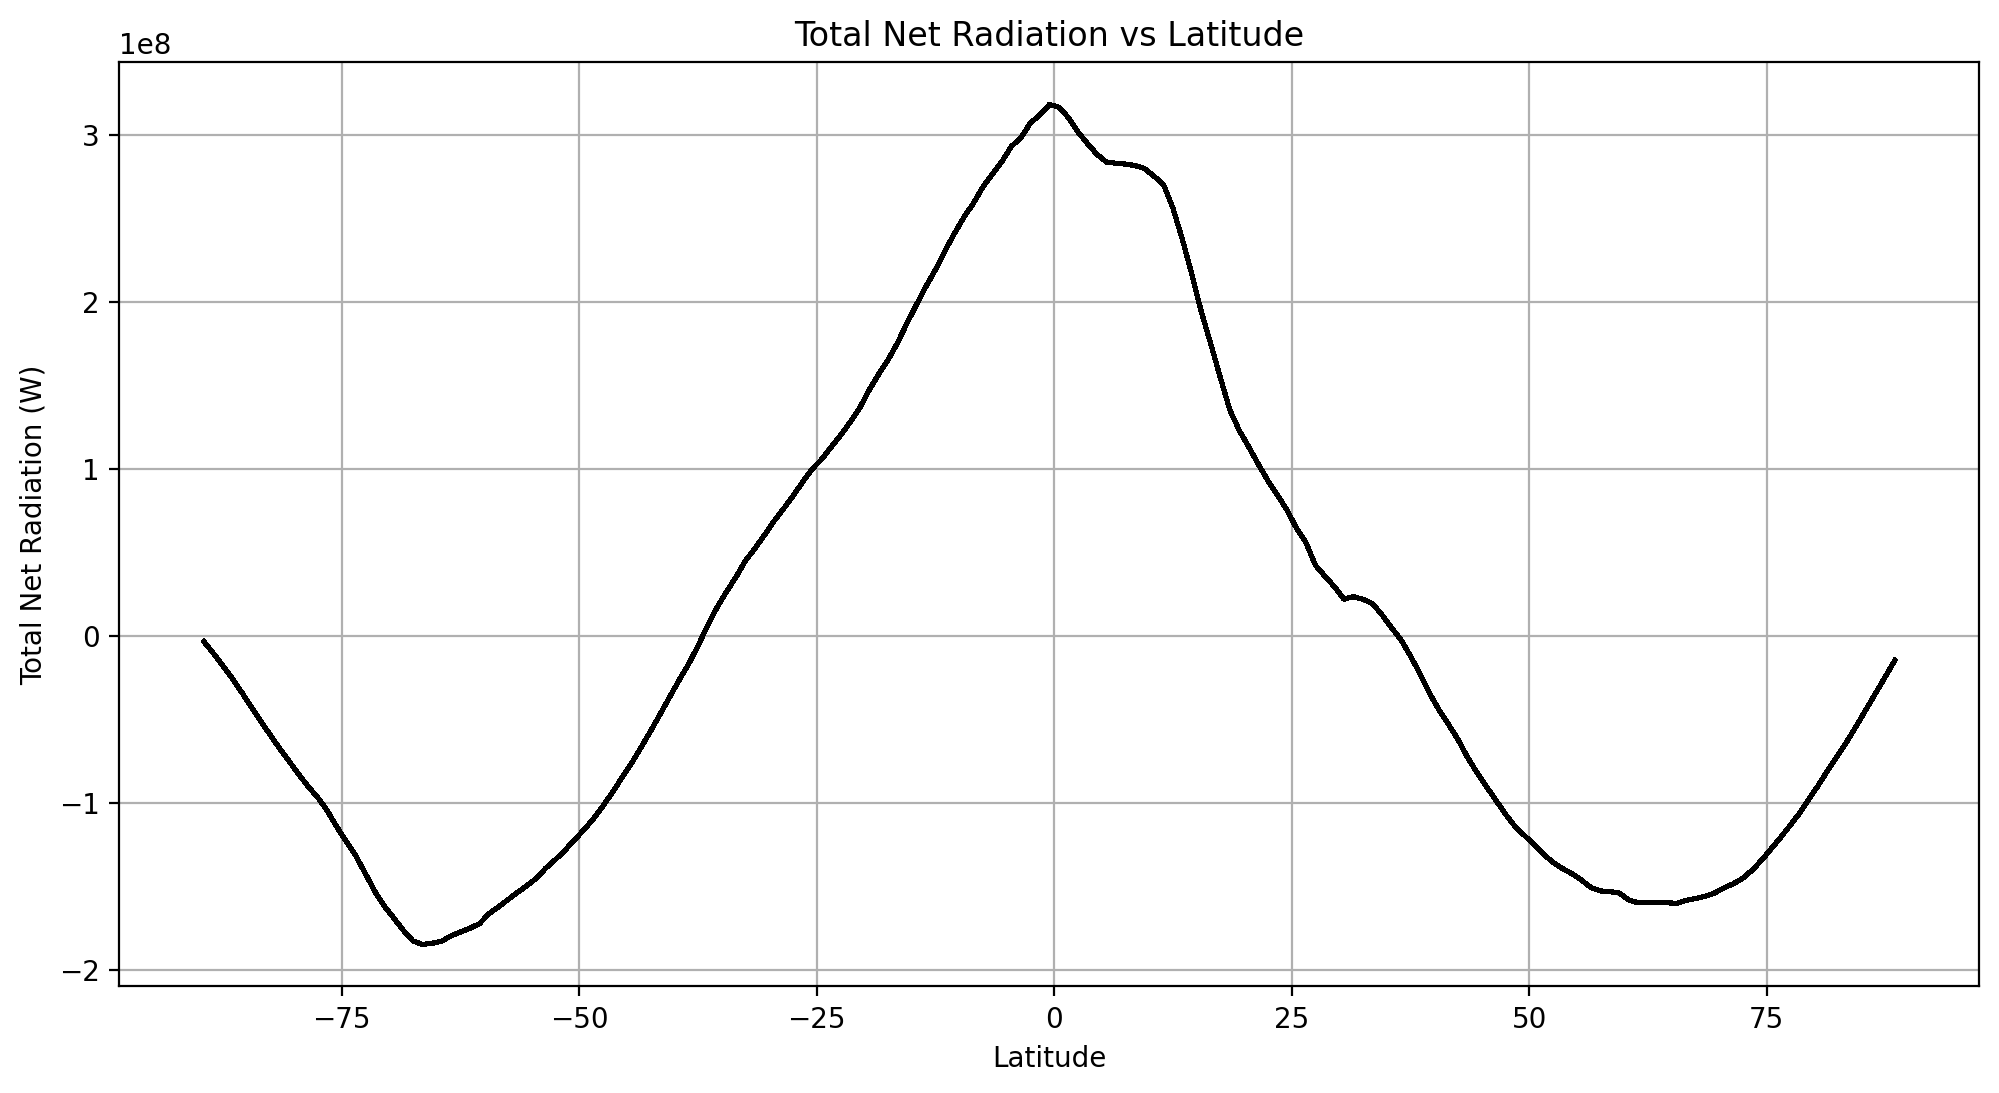

In [29]:
# Calculate sum of net flux at each of the 180 lat points across all longitudes
sum_net_flux_at_each_latitude = toa_net_flux.sum(dim='lon')

# Calculate net radiation for each latitude band
net_radiation_per_degree_latitude_band = sum_net_flux_at_each_latitude * dA

# Plot the total net radiation
plt.plot(net_radiation_per_degree_latitude_band.lat, net_radiation_per_degree_latitude_band, color='black');
plt.grid(True);
plt.xlabel('Latitude');
plt.ylabel('Total Net Radiation (W)');
plt.title('Total Net Radiation vs Latitude');

## 4.3) Plot the cumulative sum of the total amount of net radiation as a function of latitude
Label with correct units. (Hint: check out xarray’s cumsum function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

You should get a curve that looks something like this: https://journals.ametsoc.org/view/journals/clim/14/16/full-i1520-0442-14-16-3433-f07.gif (Figure from Trenberth & Caron, 2001)

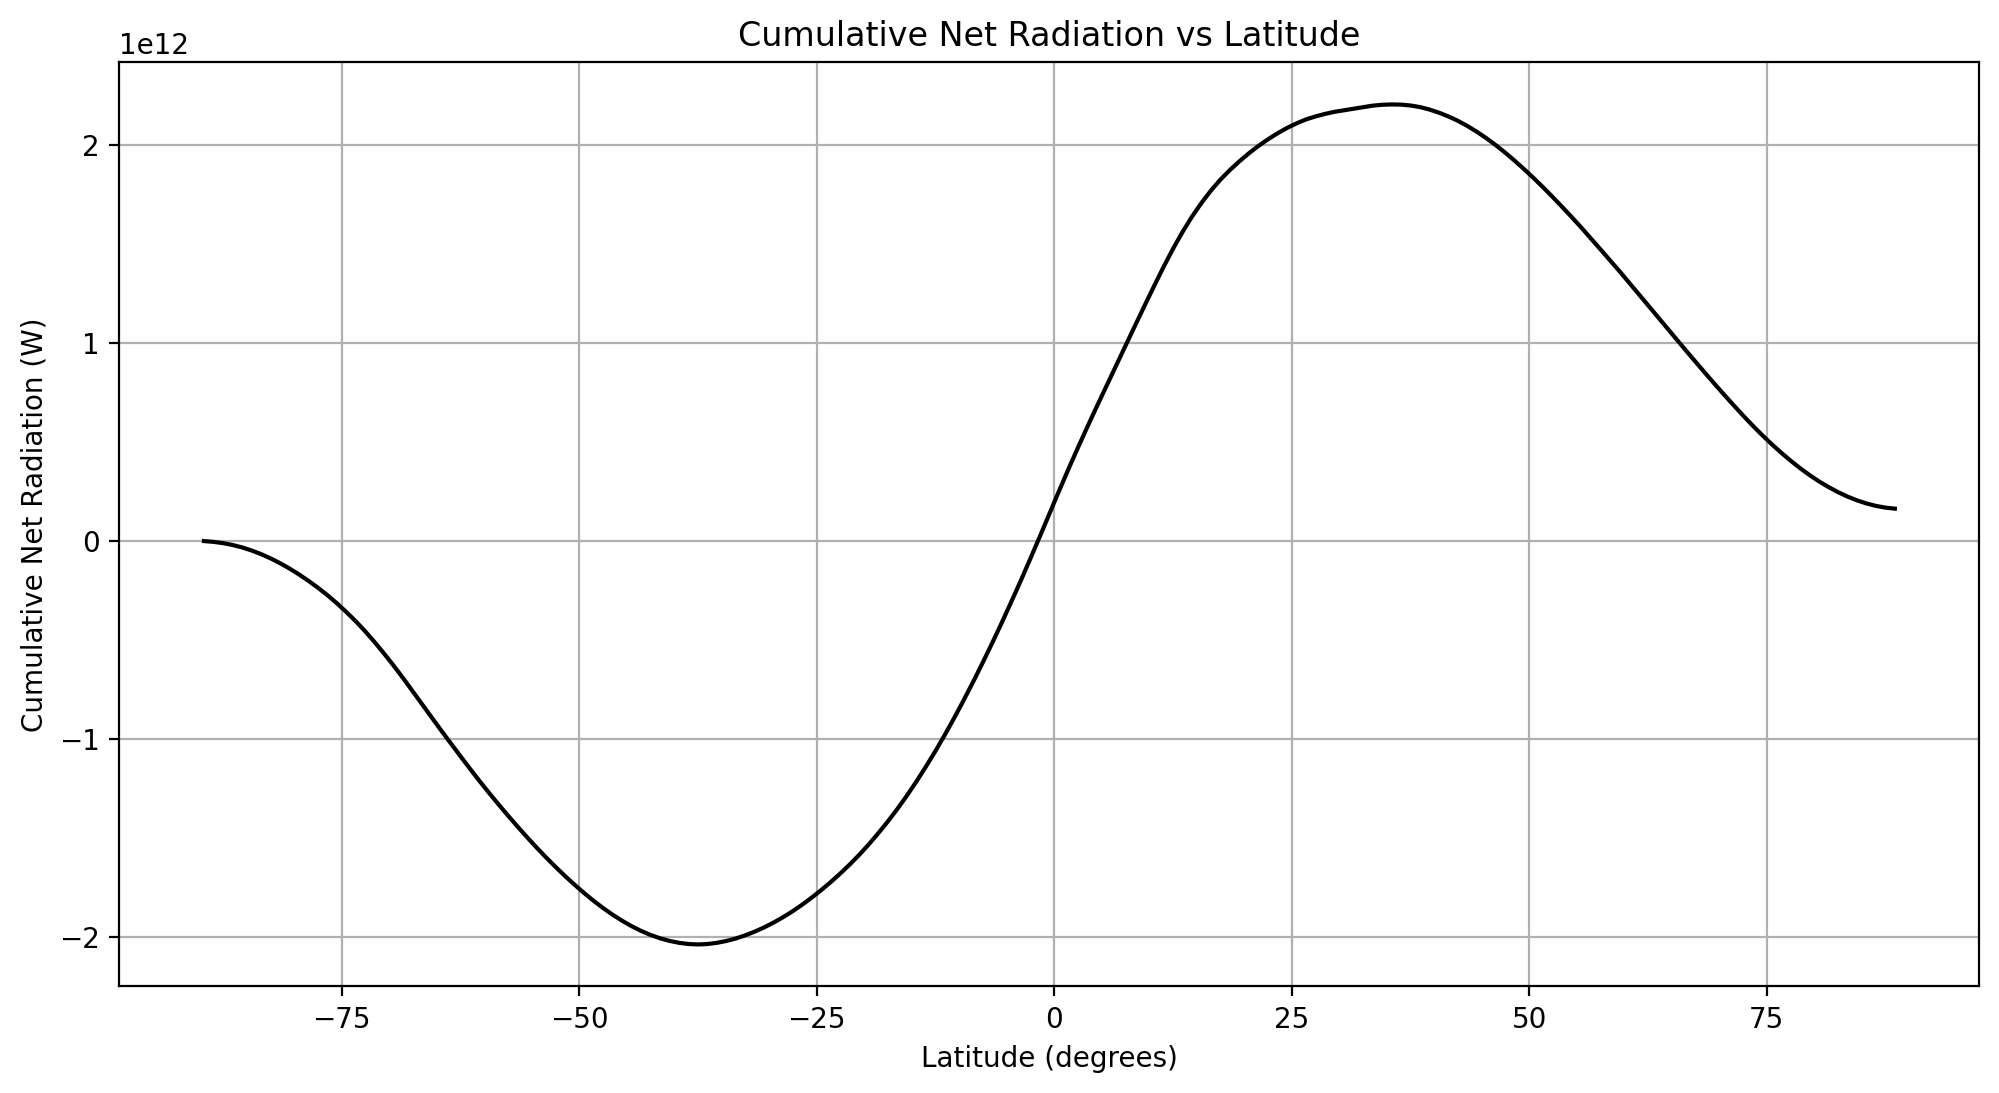

In [30]:
# Calculate the cumulative sum of the total net radiation
cumulative_net_radiation = np.cumsum(net_radiation_per_degree_latitude_band.sum(dim='lon'))

# Plot the cumulative sum
plt.plot(cumulative_net_radiation.lat, cumulative_net_radiation, color='black')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cumulative Net Radiation (W)')
plt.title('Cumulative Net Radiation vs Latitude')
plt.grid(True)
plt.show()

## 5.1) Create a Dataset for each point from the global dataset
Each city should get its own Dataset with the same variables as the one you imported. Find the nearest associated incoming solar radiation and net radiation timeseries at each city.

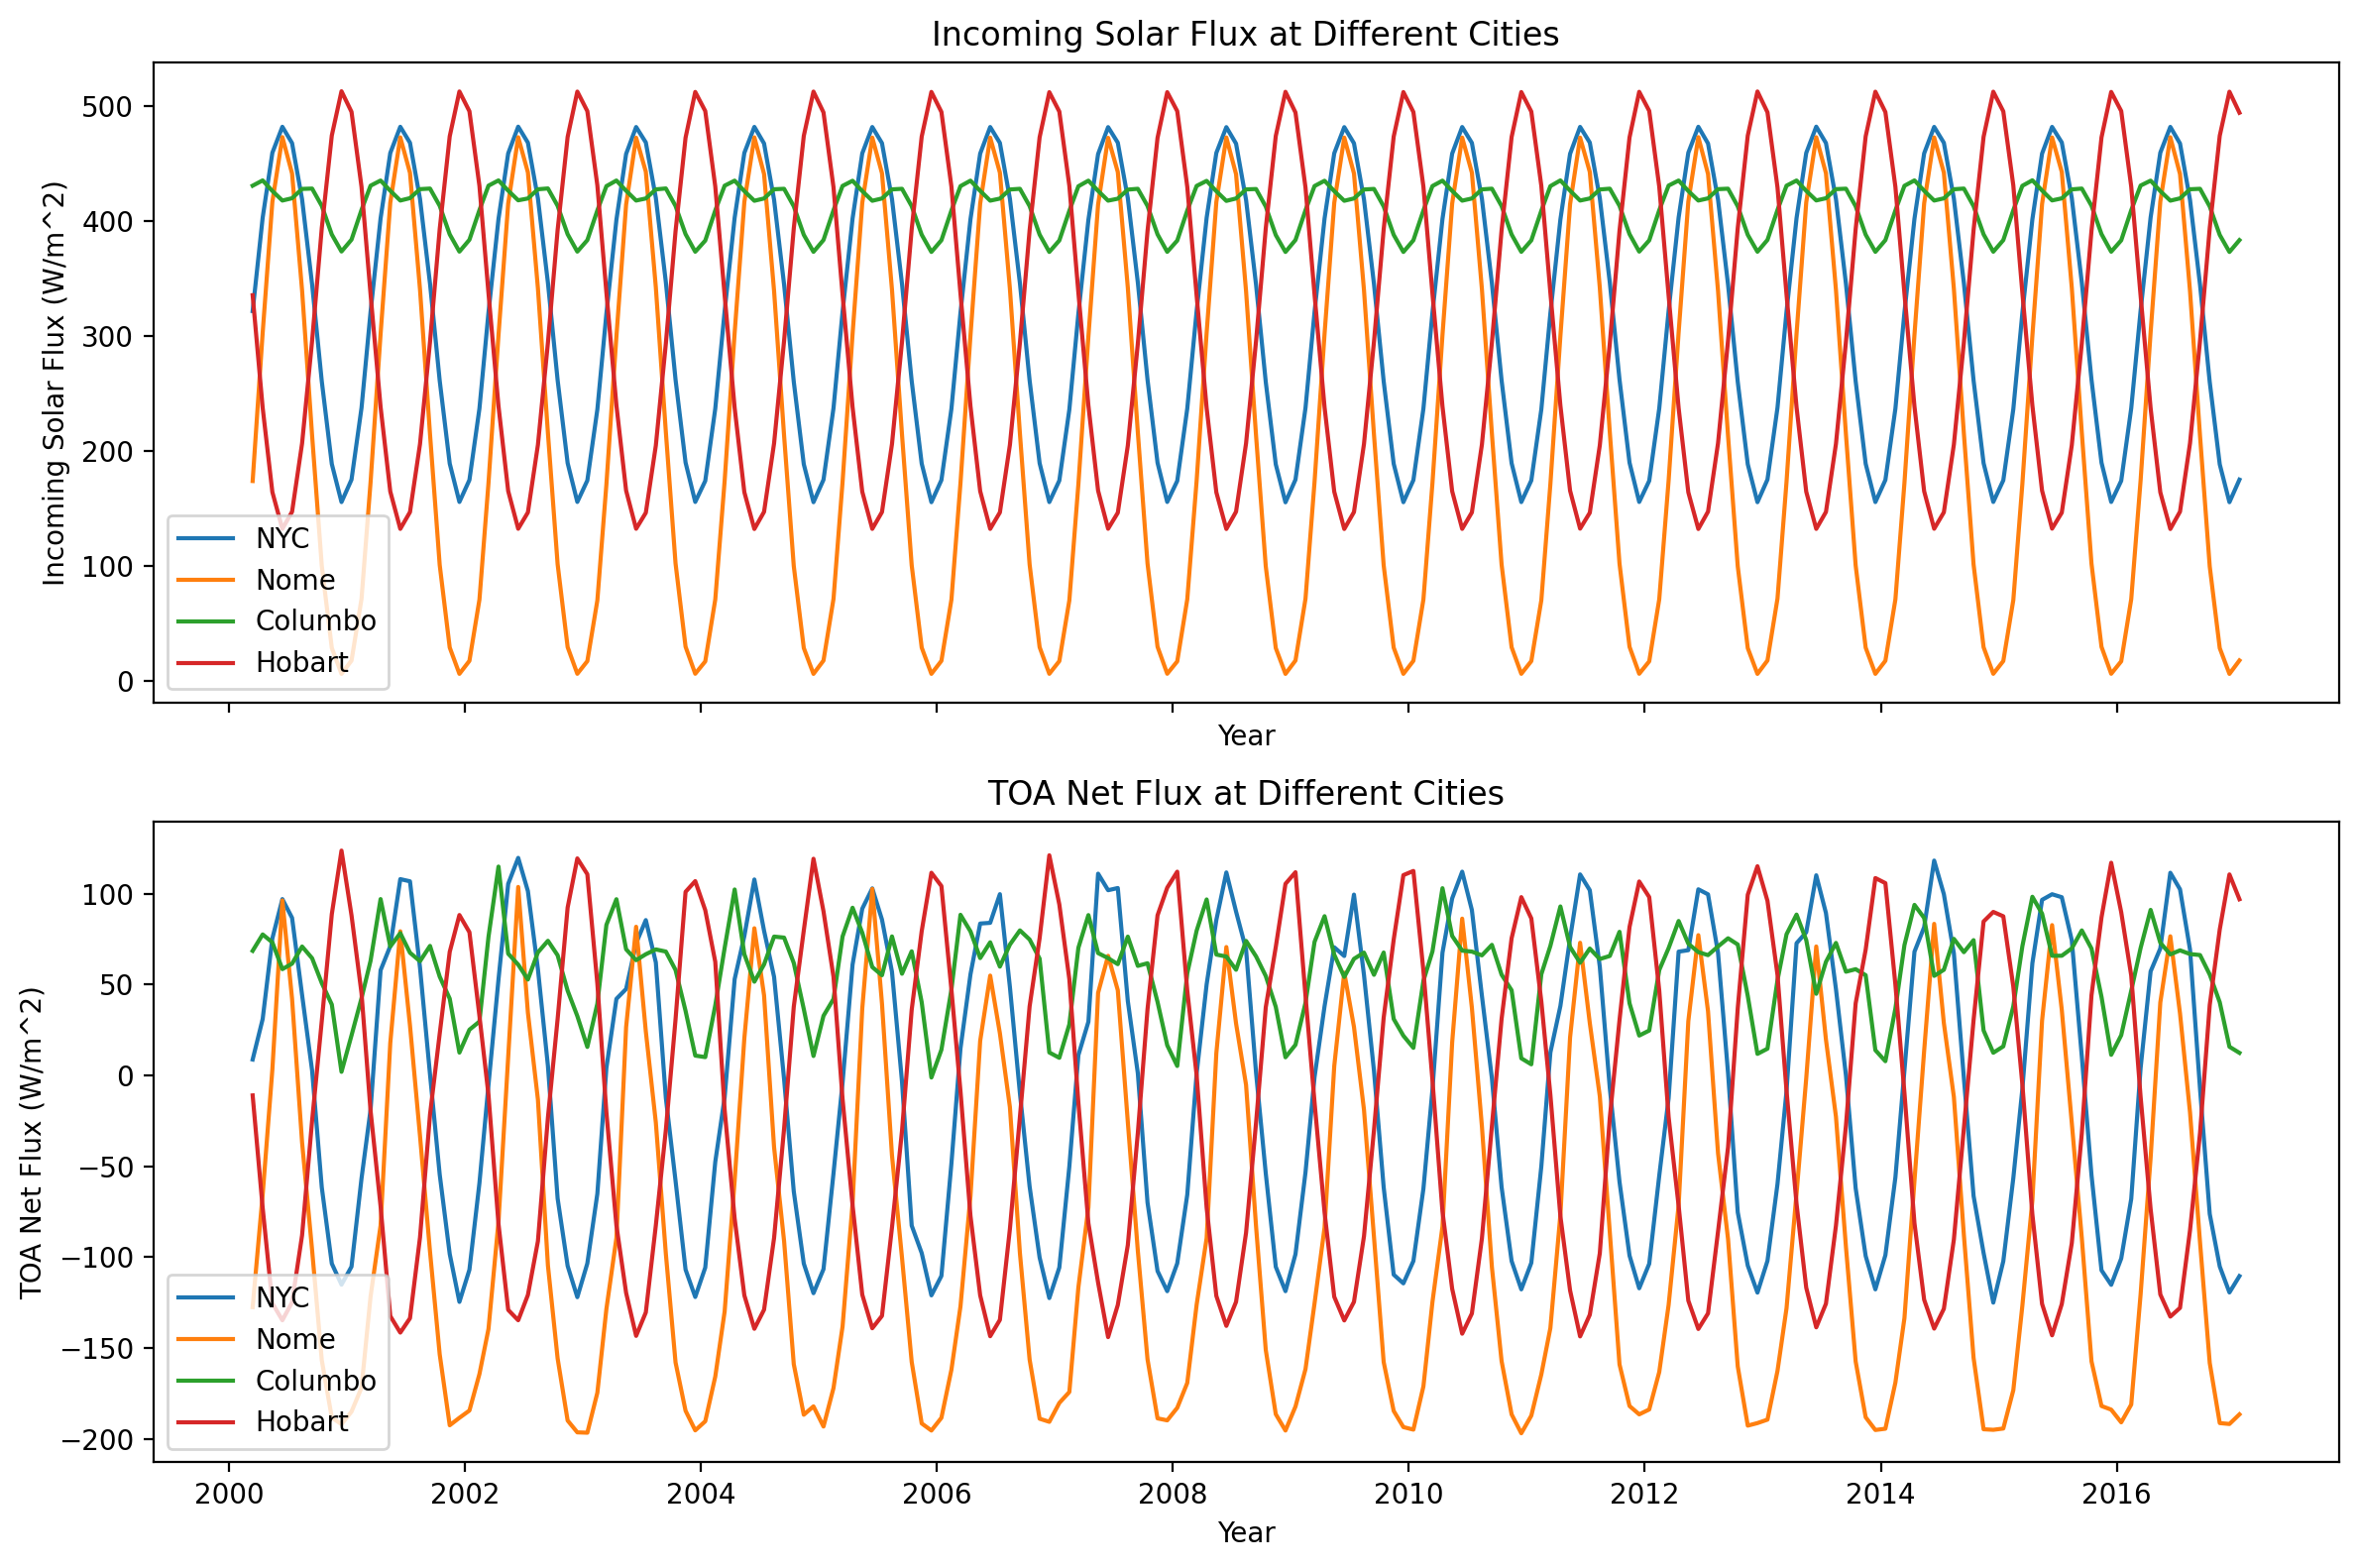

In [28]:
# Ctrate dataset for each city
NYC = ds.sel(lon=360-74, lat=40, method='nearest')
Nome = ds.sel(lon=360-165, lat=64, method='nearest')
Columbo = ds.sel(lon=80, lat=7, method='nearest')
Hobart = ds.sel(lon=147, lat=-43, method='nearest')

# Plot timeseries
fig, ax = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

# Incoming solar flux timeseries
NYC.solar_mon.plot(ax=ax[0], label='NYC')
Nome.solar_mon.plot(ax=ax[0], label='Nome')
Columbo.solar_mon.plot(ax=ax[0], label='Columbo')
Hobart.solar_mon.plot(ax=ax[0], label='Hobart')
ax[0].set_title('Incoming Solar Flux at Different Cities')
ax[0].set_ylabel('Incoming Solar Flux (W/m^2)')
ax[0].set_xlabel('Year')
ax[0].legend()

# TOA net radiation flux timeseries
NYC.toa_net_all_mon.plot(ax=ax[1], label='NYC')
Nome.toa_net_all_mon.plot(ax=ax[1], label='Nome')
Columbo.toa_net_all_mon.plot(ax=ax[1], label='Columbo')
Hobart.toa_net_all_mon.plot(ax=ax[1], label='Hobart')
ax[1].set_title('TOA Net Flux at Different Cities')
ax[1].set_ylabel('TOA Net Flux (W/m^2)')
ax[1].legend()


plt.xlabel('Year')
plt.tight_layout()
plt.show()


## 5.2) Merge these four datasets into a new dataset with the new dimension city
Create a new dimension coordinate to hold the city name. Display the merged dataset.

In [19]:
merged_dataset = xr.concat([NYC, Nome, Columbo, Hobart], dim='city')
merged_dataset

<xarray.Dataset>
Dimensions:                      (city: 4, time: 203)
Coordinates:
    lon                          (city) float32 286.5 195.5 80.5 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          (city) float32 40.5 64.5 7.5 -42.5
Dimensions without coordinates: city
Data variables: (12/14)
    toa_sw_all_mon               (city, time) float32 89.36 155.3 ... 137.6
    toa_lw_all_mon               (city, time) float32 223.2 216.2 ... 259.2
    toa_net_all_mon              (city, time) float32 8.813 31.08 ... 97.02
    toa_sw_clr_mon               (city, time) float32 38.75 47.61 ... 75.11
    toa_lw_clr_mon               (city, time) float32 253.2 259.4 ... 284.6
    toa_net_clr_mon              (city, time) float32 29.48 95.62 ... 134.2
    ...                           ...
    toa_cre_net_mon              (city, time) float32 -20.66 -64.55 ... -37.13
    solar_mon                    (city, time) float32 321.4 402.6 ... 493.8
    cldarea_total_daynight_mon   (city, time) float32 56.61 71.12 ... 46.37
    cldpress_total_daynight_mon  (city, time) float32 574.6 510.1 ... 641.1
    cldtemp_total_daynight_mon   (city, time) float32 250.3 247.7 ... 265.2
    cldtau_total_day_mon         (city, time) float32 5.157 11.39 ... 6.653
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 5.3) Plot the incoming solar and net radiation at each city
Make two separate plots. Try to have your legend created automatically from the data.

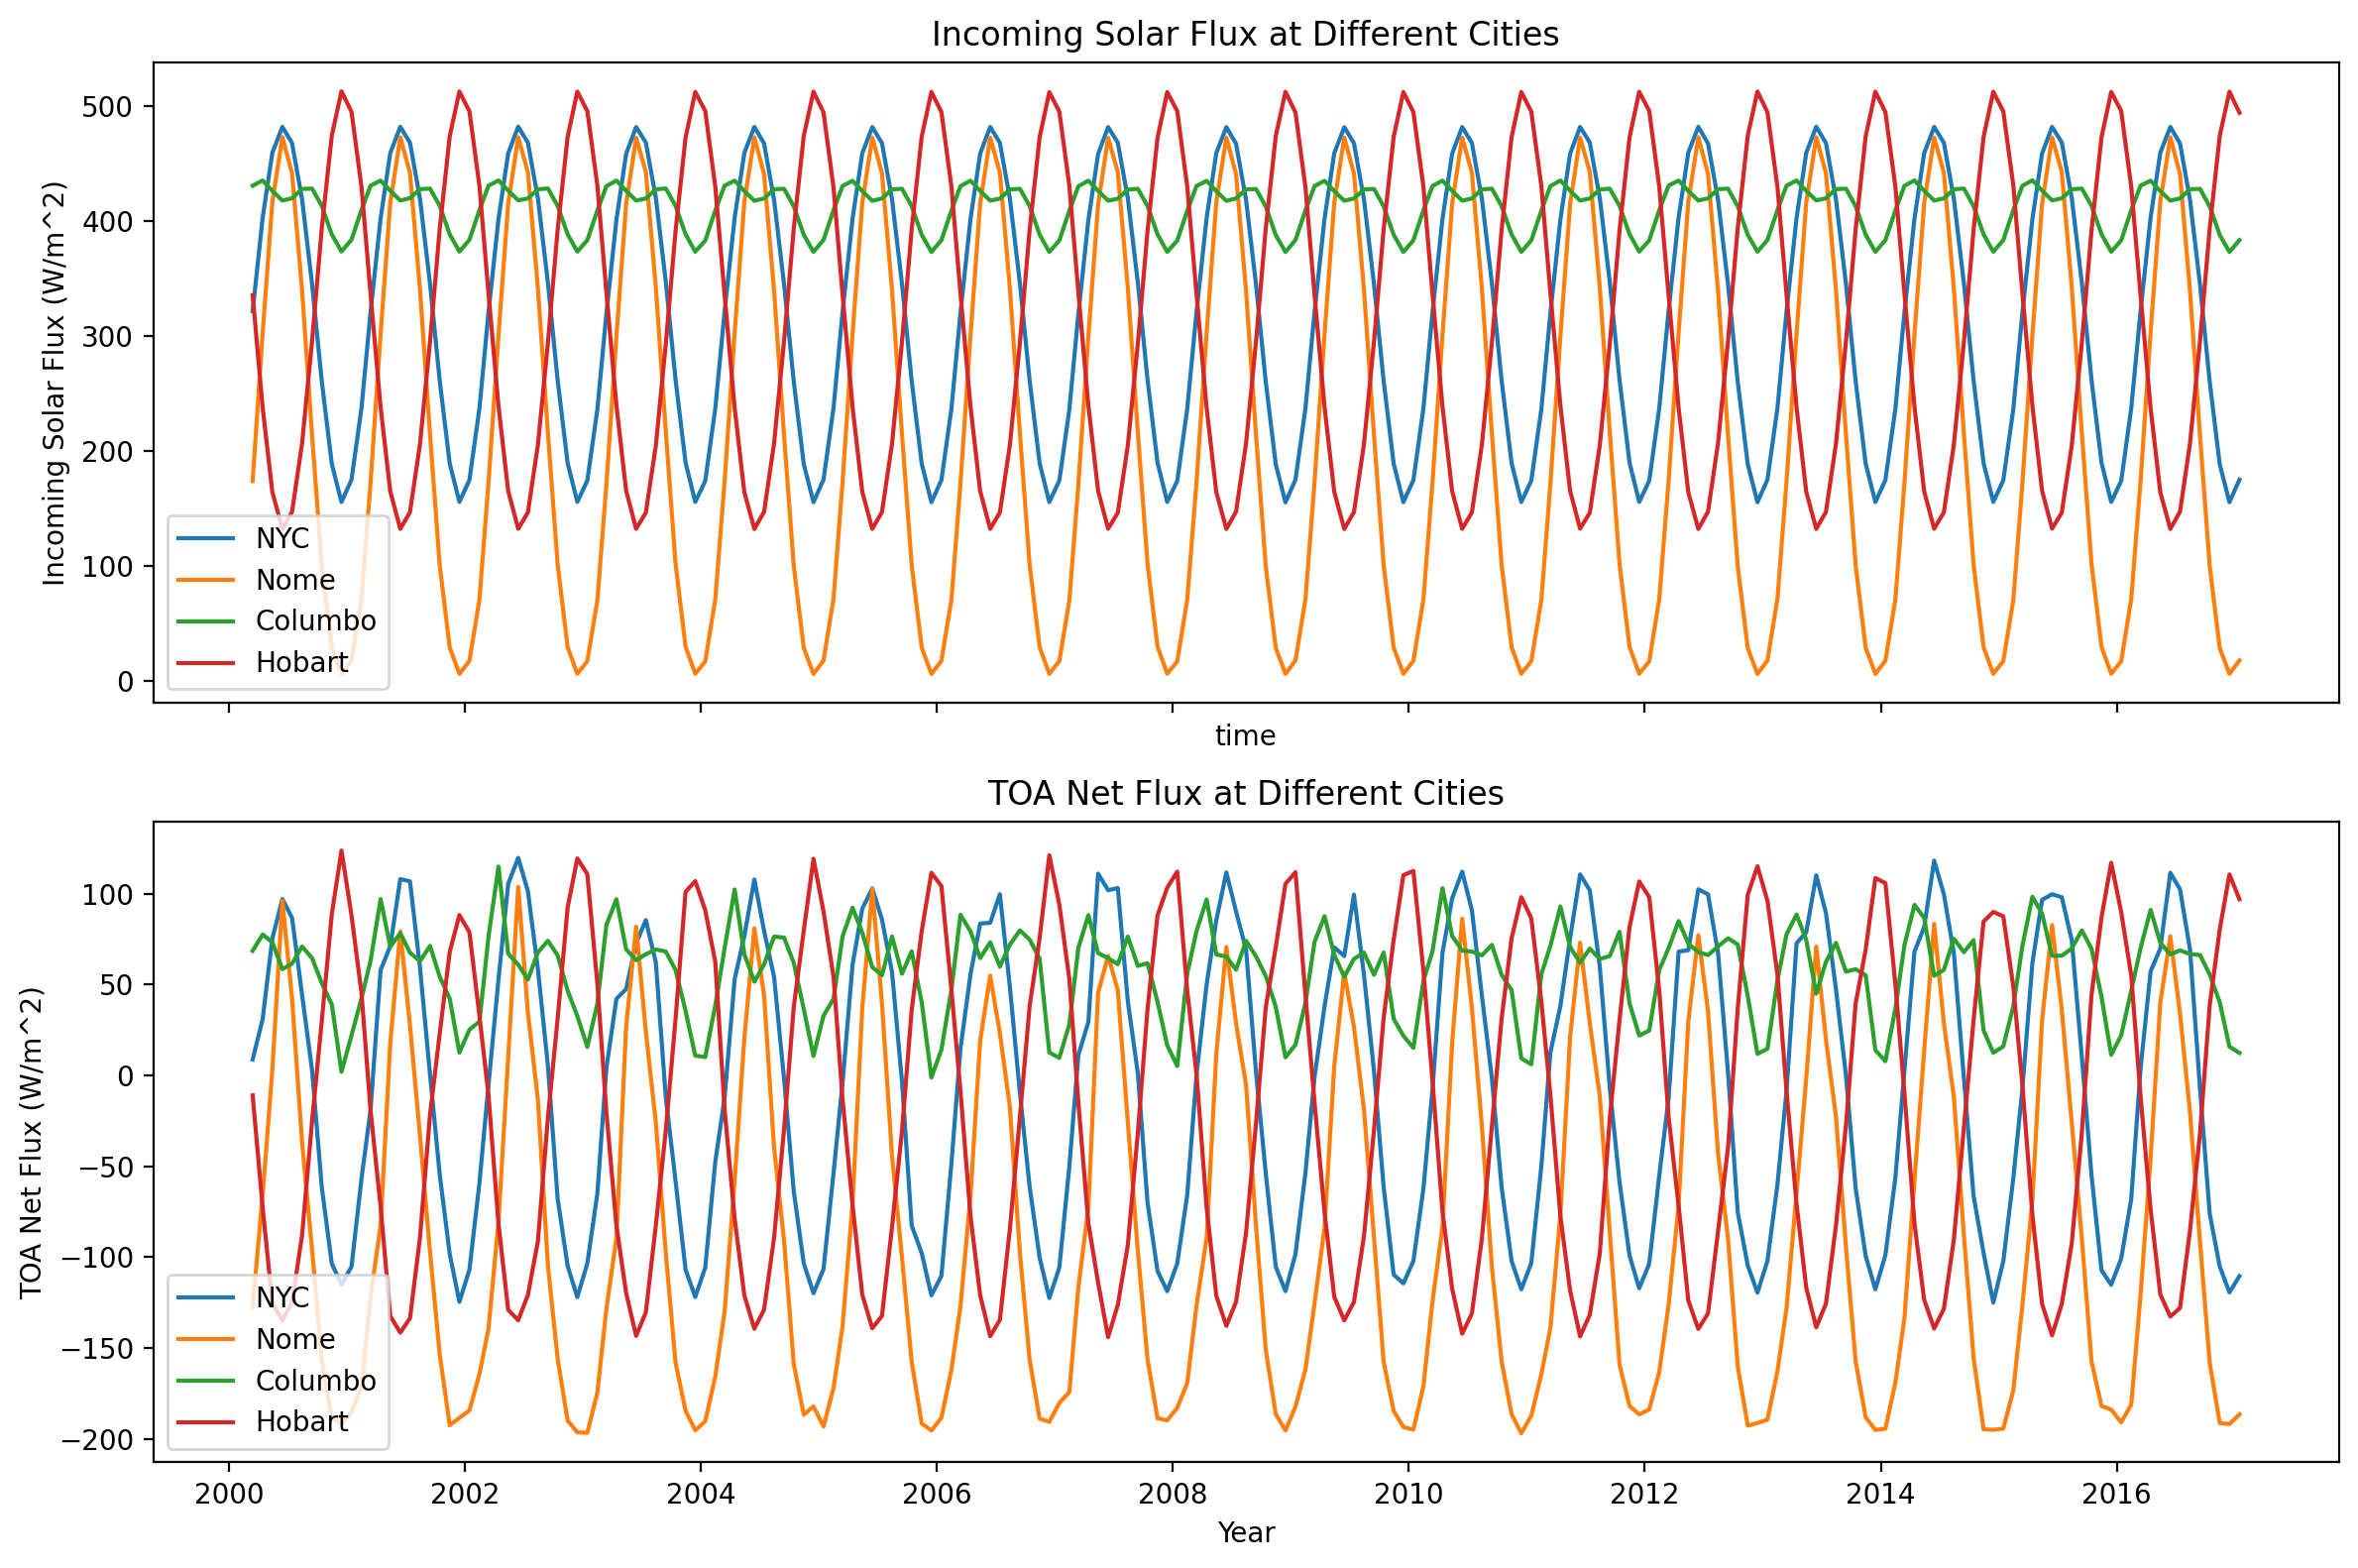

In [20]:
# Assign city names as coordinates to the "city" dimension
merged_dataset['city'] = ['NYC', 'Nome', 'Columbo', 'Hobart']

# Plot timeseries
fig, ax = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

# Incoming solar flux timeseries
merged_dataset.solar_mon.plot.line(ax=ax[0], x='time', hue='city')
ax[0].legend(labels=merged_dataset['city'].values)
ax[0].set_title('Incoming Solar Flux at Different Cities')
ax[0].set_ylabel('Incoming Solar Flux (W/m^2)')

# TOA net radiation flux timeseries
merged_dataset.toa_net_all_mon.plot.line(ax=ax[1], x='time', hue='city')
ax[1].legend(labels=merged_dataset['city'].values)
ax[1].set_title('TOA Net Flux at Different Cities')
ax[1].set_ylabel('TOA Net Flux (W/m^2)')

plt.xlabel('Year')
plt.tight_layout()
plt.show()


# *Below are alternative answers for Q4.2 (Just for my own notes, not my answers)*

## *4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band*
Multiplying the pixel area (m^2) from above with the radiative flux (W m^-2) gives you the total amount of radiation absorbed in each pixel in W.

Label with correct units.

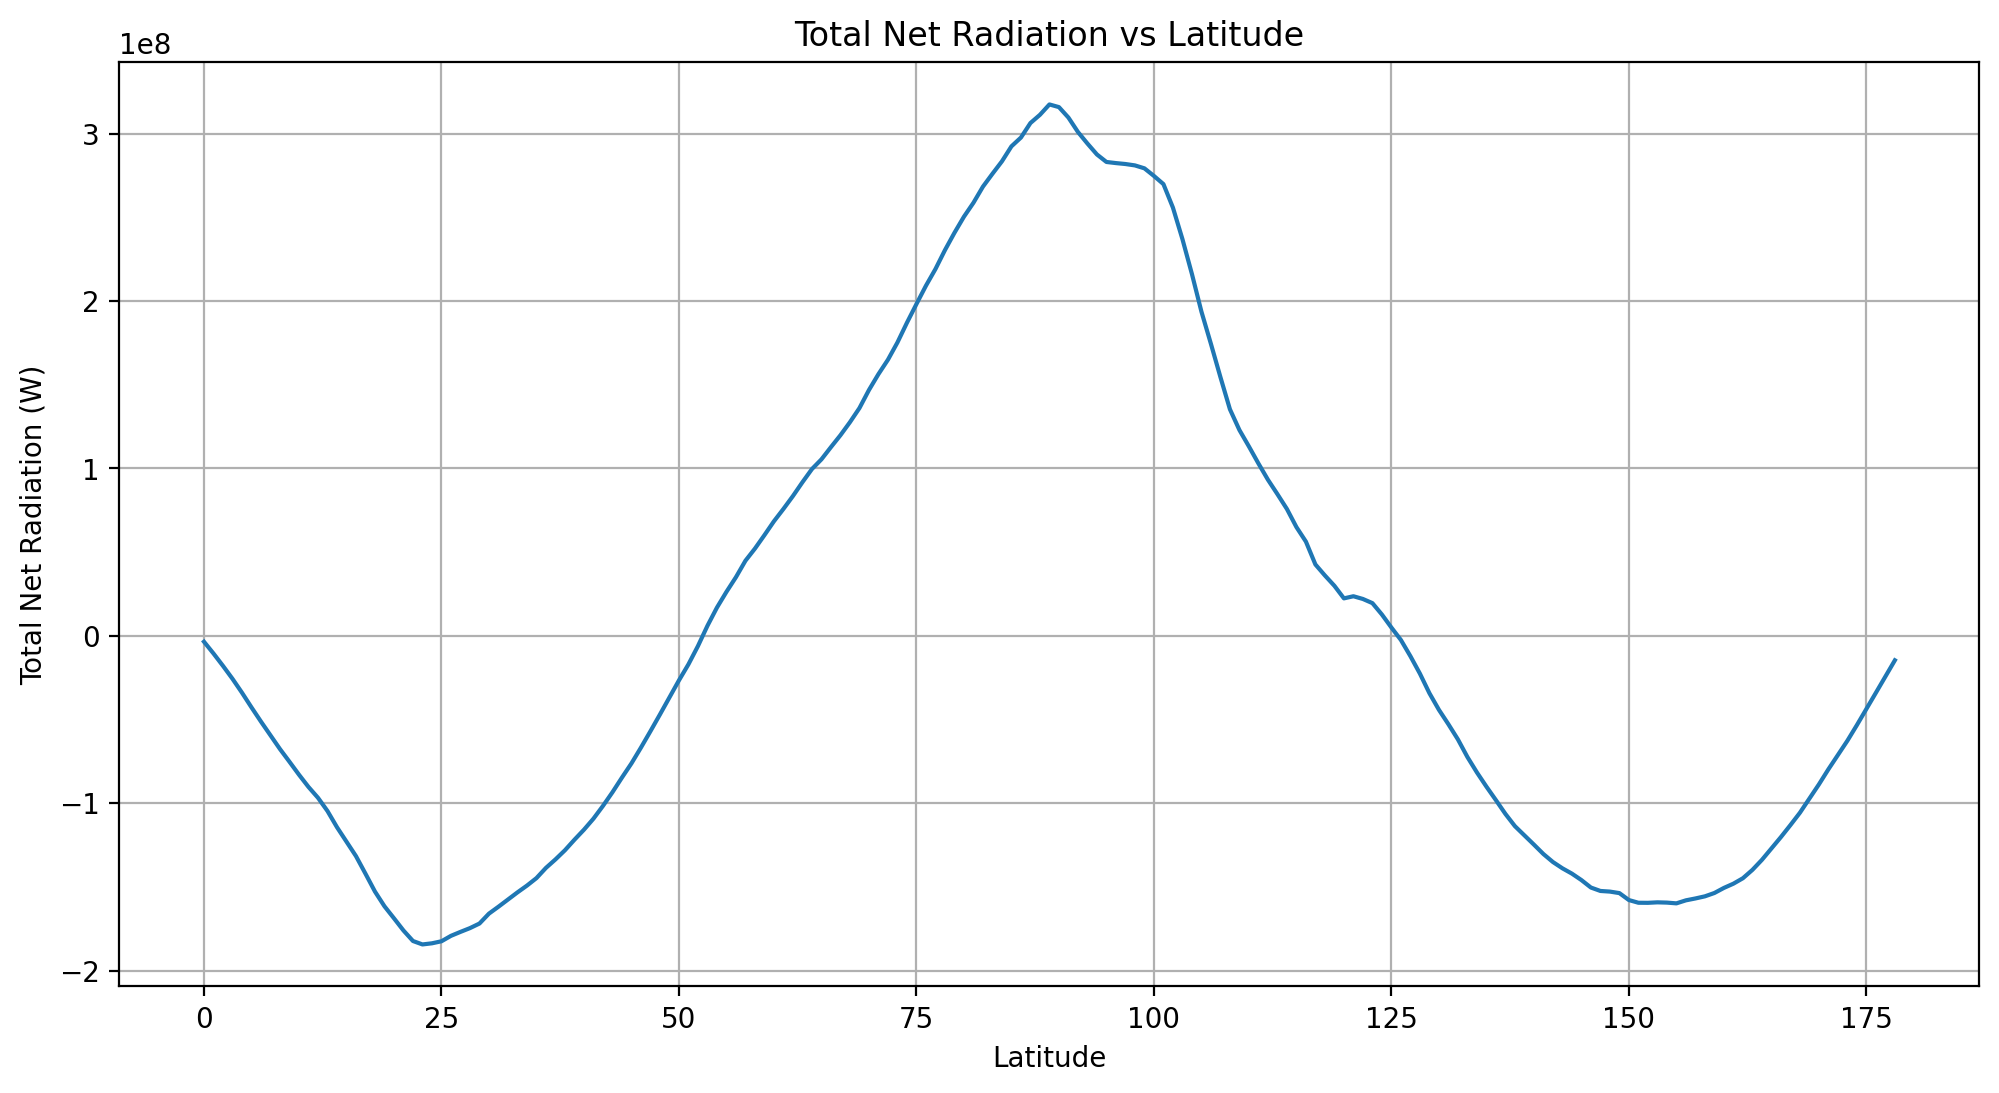

In [21]:
# Garima's method
dlamda = np.pi / 180
dphi = 2*np.pi / 360 

A = R**2 * weights * xr.ones_like(time_mean_ds.toa_net_all_mon) * distance_lon_rad * distance_lat_rad

net_per_lat = (time_mean_ds.toa_net_all_mon * A).sum('lon')

plt.plot(net_per_lat);
plt.grid(True);
plt.xlabel('Latitude');
plt.ylabel('Total Net Radiation (W)');
plt.title('Total Net Radiation vs Latitude');

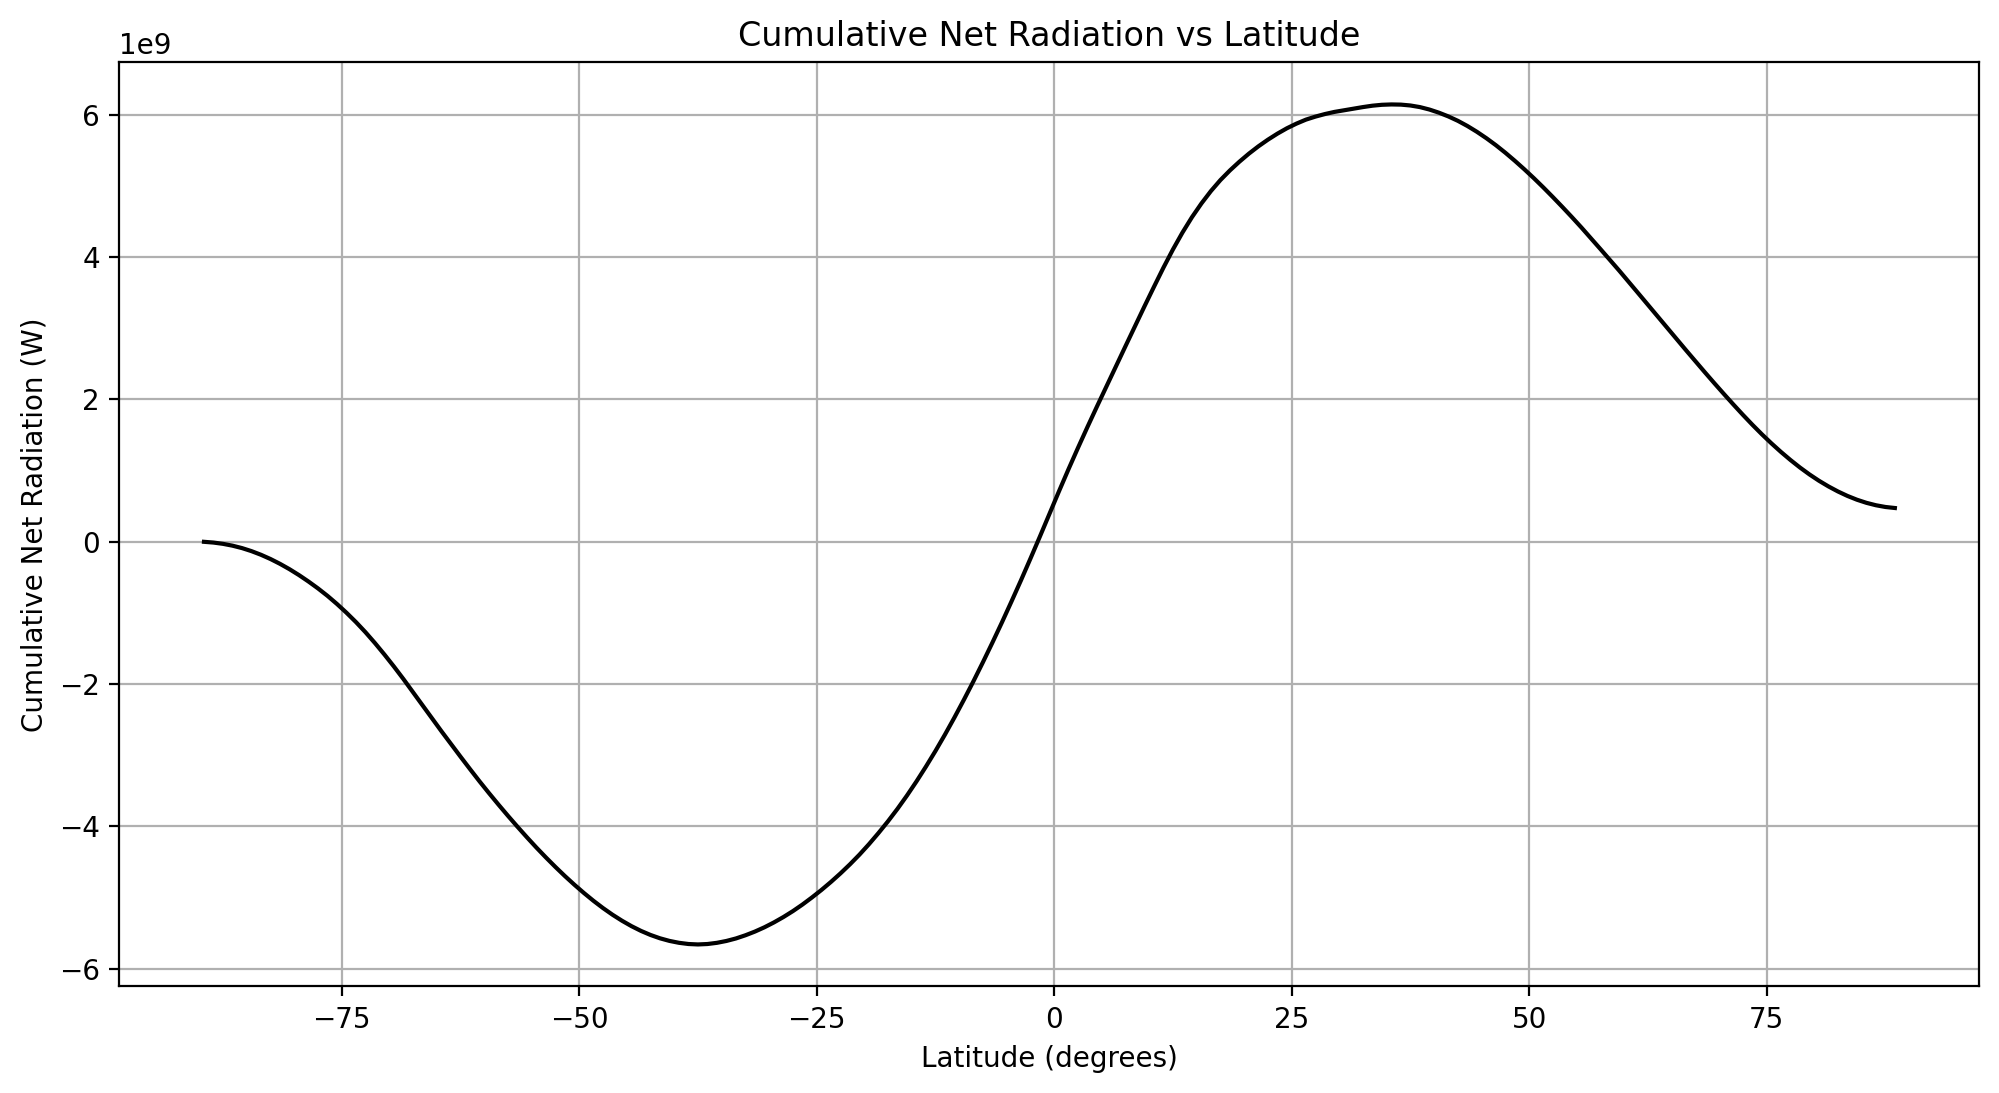

In [27]:
# Garima's method
net_per_lat_cumsum = np.cumsum(net_per_lat)
plt.plot(net_per_lat_cumsum.lat, net_per_lat_cumsum, color='black')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cumulative Net Radiation (W)')
plt.title('Cumulative Net Radiation vs Latitude')
plt.grid(True)
plt.show()

In [26]:
net_radiation_per_degree_latitude_band

<xarray.DataArray (lat: 179, lon: 359)>
array([[ -3545913.87263403,  -3545913.11578216,  -3545913.87263403, ...,
         -3545893.4376333 ,  -3545893.4376333 ,  -3545893.4376333 ],
       [-10601492.94085598, -10601490.67803739, -10601492.94085598, ...,
        -10601431.84475387, -10601431.84475387, -10601431.84475387],
       [-18016981.4098499 , -18016977.56424431, -18016981.4098499 , ...,
        -18016877.57849877, -18016877.57849877, -18016877.57849877],
       ...,
       [-34133444.52004794, -34133437.23448982, -34133444.52004794, ...,
        -34133247.80997854, -34133247.80997854, -34133247.80997854],
       [-24431292.83808564, -24431287.62338767, -24431292.83808564, ...,
        -24431152.04124029, -24431152.04124029, -24431152.04124029],
       [-14678382.29176183, -14678379.15875815, -14678382.29176183, ...,
        -14678297.70066241, -14678297.70066241, -14678297.70066241]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 85.5 86.5 87.5 88.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 354.5 355.5 356.5 357.5 358.5